# Load data and plot

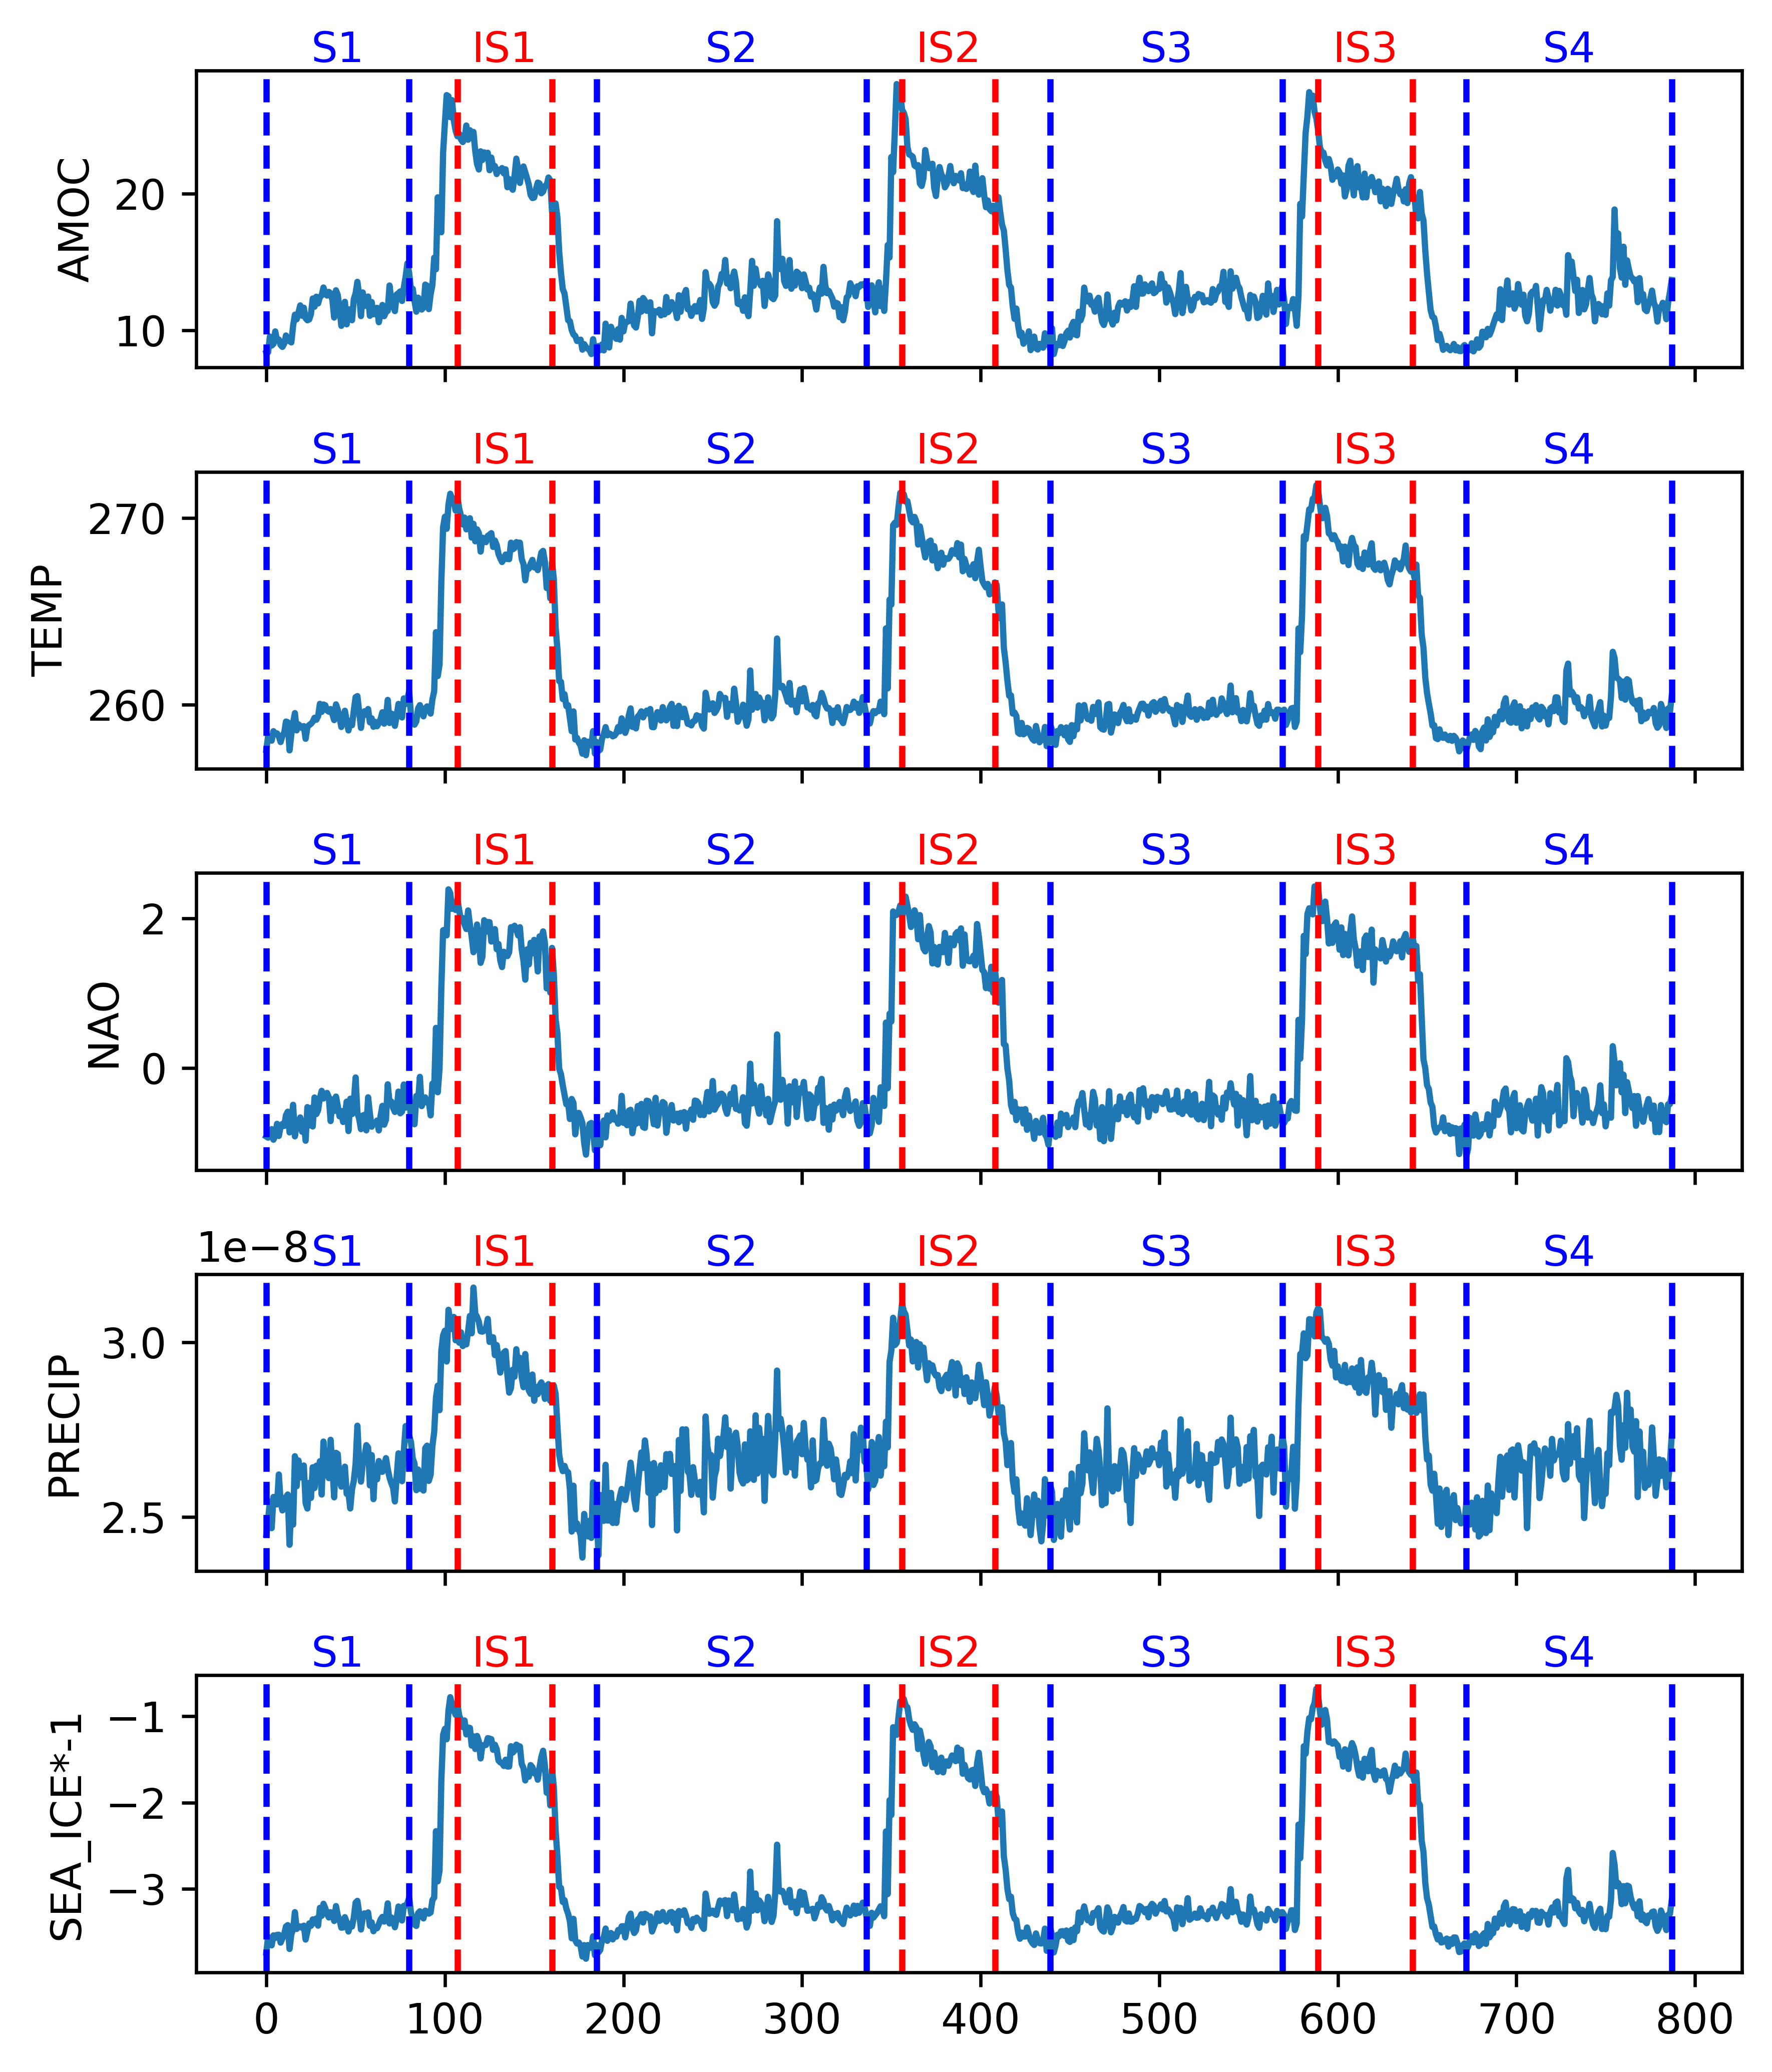

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AMOC     788 non-null    float32
 1   TEMP     788 non-null    float64
 2   NAO      788 non-null    float32
 3   PRECIP   788 non-null    float64
 4   SEA_ICE  788 non-null    float32
dtypes: float32(3), float64(2)
memory usage: 21.7 KB


In [3]:

import numpy as np
# read the AMOC data (called '200.npy') from the /data/CCSM4/AMOC/ directory
AMOC = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/AMOC/200.npy')
TEMP = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/TEMP/200.npy')
NAO = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/NAO/200.npy')
PRECIP = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/PRECIP/200.npy')
SEA_ICE = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/SEA_ICE/200.npy')


# Pack the stadial and interstadial onsets and ends into ndarrays
stadial_onsets = np.array([0, 185, 439, 672])
stadial_ends = np.array([80, 336, 569, 787])

interstadial_onsets = np.array([107, 356, 589])
interstadial_ends = np.array([160, 408, 642])

stadials = np.vstack((stadial_onsets, stadial_ends)).T
interstadials = np.vstack((interstadial_onsets, interstadial_ends)).T

# plot the data in 5 subplots

import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 1, figsize=(6, 7), sharex=True, dpi=600)
ax[0].plot(AMOC)
ax[0].set_ylabel('AMOC')
ax[1].plot(TEMP)
ax[1].set_ylabel('TEMP')
ax[2].plot(NAO)
ax[2].set_ylabel('NAO')
ax[3].plot(PRECIP)
ax[3].set_ylabel('PRECIP')
ax[4].plot(SEA_ICE*-1)
ax[4].set_ylabel('SEA_ICE*-1')

# for each subplot, add vertical lines for the stadial and interstadial onsets and ends
for onset, end in stadials:
    for i in range(5):
        ax[i].axvline(onset, color='blue', linestyle='--')
        ax[i].axvline(end, color='blue', linestyle='--')
        
for onset, end in interstadials:
    for i in range(5):
        ax[i].axvline(onset, color='red', linestyle='--')
        ax[i].axvline(end, color='red', linestyle='--')

stadial_labels = ['S1', 'S2', 'S3', 'S4']
interstadial_labels = ['IS1', 'IS2', 'IS3']

# add labels for the stadials and interstadials
for (onset, end), label in zip(stadials, stadial_labels):
    for i in range(5):
        midpoint = (onset + end) / 2
        ax[i].text(midpoint, ax[i].get_ylim()[1], label, color='blue', va='bottom', ha='center')

for (onset, end), label in zip(interstadials, interstadial_labels):
    for i in range(5):
        midpoint = (onset + end) / 2
        ax[i].text(midpoint, ax[i].get_ylim()[1], label, color='red', va='bottom', ha='center')

plt.tight_layout()

plt.show()


import pandas as pd
df_all_vars= pd.DataFrame({'AMOC': AMOC, 'TEMP': TEMP, 'NAO': NAO, 'PRECIP': PRECIP, 'SEA_ICE': SEA_ICE})
df_all_vars.info()

# Crop data

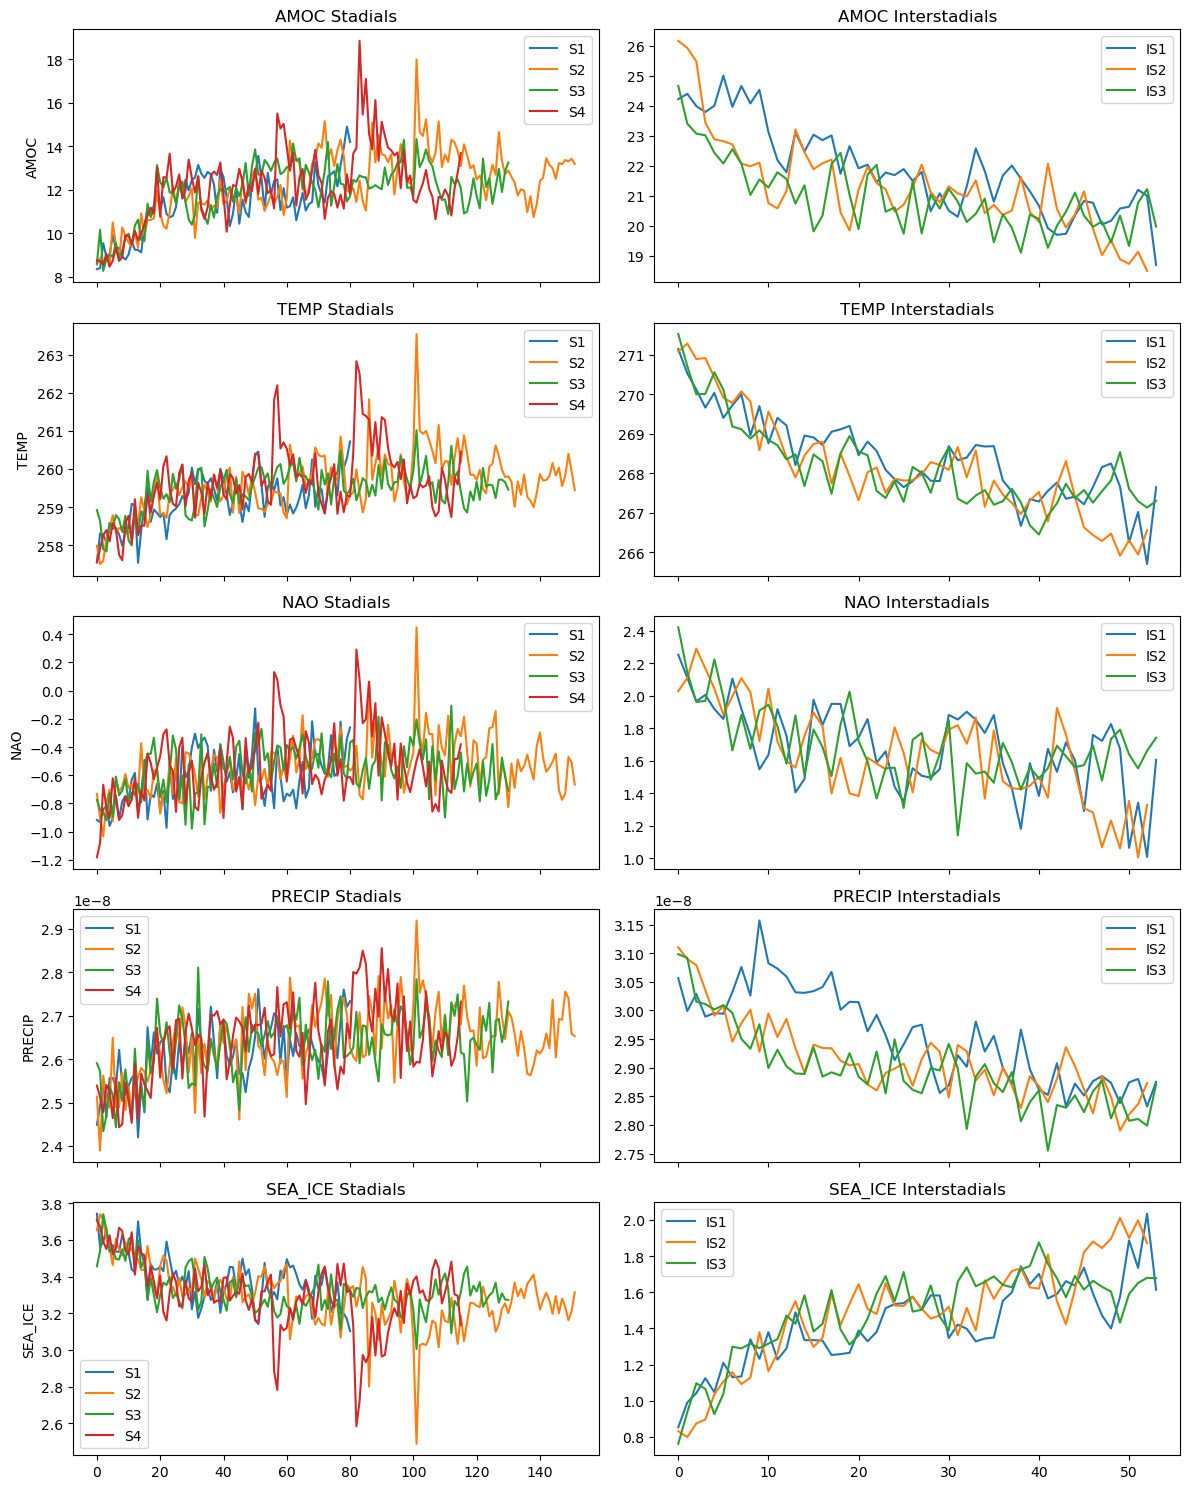

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data arrays are loaded (AMOC, TEMP, NAO, PRECIP, SEA_ICE)

# Define your stadial and interstadial periods and labels
stadials = np.array([[0, 80], [185, 336], [439, 569], [672, 787]])
interstadials = np.array([[107, 160], [356, 408], [589, 642]])
stadial_labels = ['S1', 'S2', 'S3', 'S4']
interstadial_labels = ['IS1', 'IS2', 'IS3']

# Function to crop data based on periods
def crop_data(data, periods):
    cropped_data = []
    for onset, end in periods:
        cropped_data.append(data[onset:end+1])
    return cropped_data

# Crop the data for each variable
AMOC_stadials = crop_data(AMOC, stadials)
TEMP_stadials = crop_data(TEMP, stadials)
NAO_stadials = crop_data(NAO, stadials)
PRECIP_stadials = crop_data(PRECIP, stadials)
SEA_ICE_stadials = crop_data(SEA_ICE, stadials)

AMOC_interstadials = crop_data(AMOC, interstadials)
TEMP_interstadials = crop_data(TEMP, interstadials)
NAO_interstadials = crop_data(NAO, interstadials)
PRECIP_interstadials = crop_data(PRECIP, interstadials)
SEA_ICE_interstadials = crop_data(SEA_ICE, interstadials)

# Plot the cropped data for stadials and interstadials
variables = ['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE']
stadial_data = [AMOC_stadials, TEMP_stadials, NAO_stadials, PRECIP_stadials, SEA_ICE_stadials]
interstadial_data = [AMOC_interstadials, TEMP_interstadials, NAO_interstadials, PRECIP_interstadials, SEA_ICE_interstadials]

fig, axs = plt.subplots(5, 2, figsize=(12, 15), sharex='col')
for i, var in enumerate(variables):
    for j, data in enumerate(stadial_data[i]):
        axs[i, 0].plot(data, label=f'{stadial_labels[j]}')
    axs[i, 0].set_ylabel(var)
    axs[i, 0].set_title(f'{var} Stadials')
    axs[i, 0].legend()

    for j, data in enumerate(interstadial_data[i]):
        axs[i, 1].plot(data, label=f'{interstadial_labels[j]}')
    axs[i, 1].set_title(f'{var} Interstadials')
    axs[i, 1].legend()

plt.tight_layout()
plt.show()


# Store the cropped data in DataFrames
stadial_dfs = {
    'AMOC': pd.DataFrame(AMOC_stadials).T,
    'TEMP': pd.DataFrame(TEMP_stadials).T,
    'NAO': pd.DataFrame(NAO_stadials).T,
    'PRECIP': pd.DataFrame(PRECIP_stadials).T,
    'SEA_ICE': pd.DataFrame(SEA_ICE_stadials).T
}

interstadial_dfs = {
    'AMOC': pd.DataFrame(AMOC_interstadials).T,
    'TEMP': pd.DataFrame(TEMP_interstadials).T,
    'NAO': pd.DataFrame(NAO_interstadials).T,
    'PRECIP': pd.DataFrame(PRECIP_interstadials).T,
    'SEA_ICE': pd.DataFrame(SEA_ICE_interstadials).T
}


# Detrend data

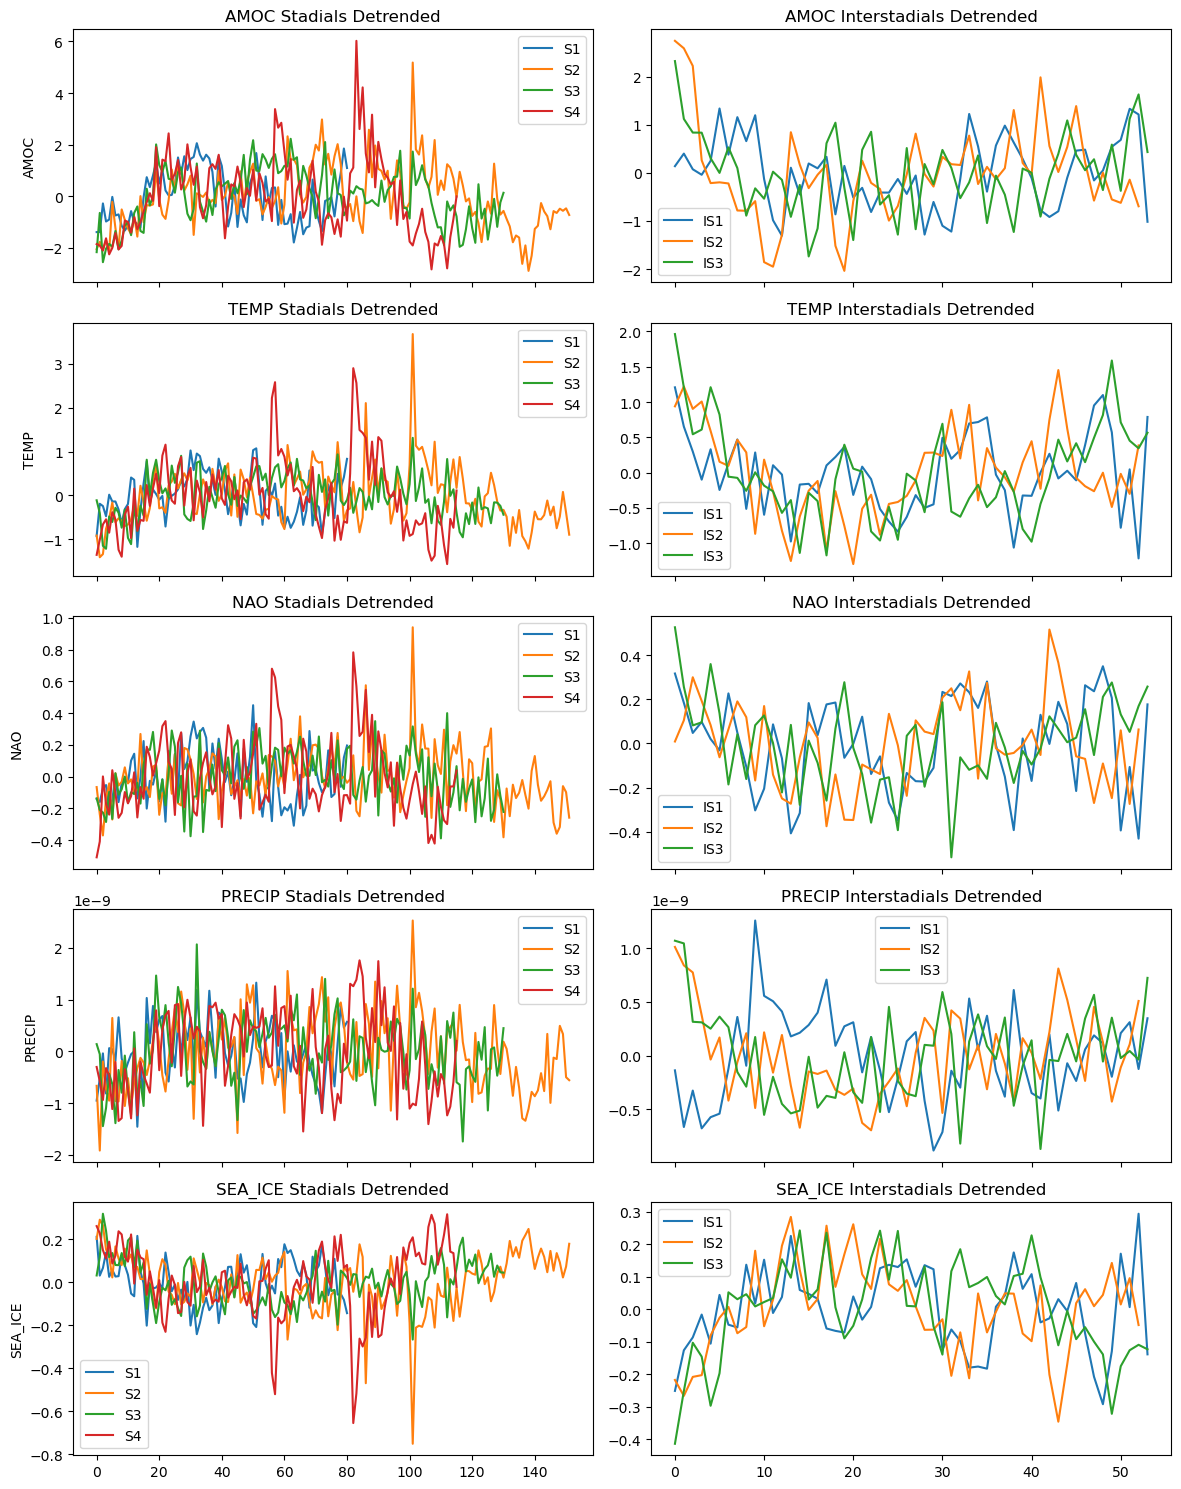

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import detrend


# Function to crop data based on periods
def crop_data(data, periods):
    cropped_data = []
    for onset, end in periods:
        cropped_data.append(data[onset:end+1])
    return cropped_data

# Function to detrend and store as list of arrays
def detrend_and_store(cropped_data):
    detrended = []
    for data in cropped_data:
        if len(data) > 1:  # Ensure there's enough data to detrend
            detrended.append(detrend(data))
        else:
            detrended.append(data)  # If only one point or empty, skip detrending
    return detrended

# Crop the data for each variable
variables = ['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE']
data_dict = {'AMOC': AMOC, 'TEMP': TEMP, 'NAO': NAO, 'PRECIP': PRECIP, 'SEA_ICE': SEA_ICE}
stadial_data = {var: crop_data(data_dict[var], stadials) for var in variables}
interstadial_data = {var: crop_data(data_dict[var], interstadials) for var in variables}

# Detrend the cropped data
detrended_stadials = {var: detrend_and_store(stadial_data[var]) for var in variables}
detrended_interstadials = {var: detrend_and_store(interstadial_data[var]) for var in variables}

# Plotting the detrended data
fig, axs = plt.subplots(5, 2, figsize=(12, 15), sharex='col')
for i, var in enumerate(variables):
    # Plot detrended stadials
    for j, data in enumerate(detrended_stadials[var]):
        axs[i, 0].plot(data, label=f'{stadial_labels[j]}')
    axs[i, 0].set_title(f'{var} Stadials Detrended')
    axs[i, 0].set_ylabel(var)
    axs[i, 0].legend()

    # Plot detrended interstadials
    for j, data in enumerate(detrended_interstadials[var]):
        axs[i, 1].plot(data, label=f'{interstadial_labels[j]}')
    axs[i, 1].set_title(f'{var} Interstadials Detrended')
    axs[i, 1].legend()

plt.tight_layout()
plt.show()


In [24]:
# save the stadial and interstadial data under data/ using pickle
import pickle

with open('data/stadial_data.pkl', 'wb') as f:
    pickle.dump(detrended_stadials, f)

with open('data/interstadial_data.pkl', 'wb') as f:
    pickle.dump(detrended_interstadials, f)


In [25]:
# Load the stadial and interstadial data from the pickle files
import pickle

with open('data/stadial_data.pkl', 'rb') as f:
    detrended_stadials = pickle.load(f)

with open('data/interstadial_data.pkl', 'rb') as f:
    detrended_interstadials = pickle.load(f)

    

In [11]:
# save detrended_stadials and detrended_interstadials under /data/

np.save('data/detrended_stadials.npy', detrended_stadials)
np.save('data/detrended_interstadials.npy', detrended_interstadials)


In [12]:
# load the detrended data
detrended_stadials = np.load('data/detrended_stadials.npy', allow_pickle=True).item()
detrended_interstadials = np.load('data/detrended_interstadials.npy', allow_pickle=True).item()

# PCMCI for S1 to S4

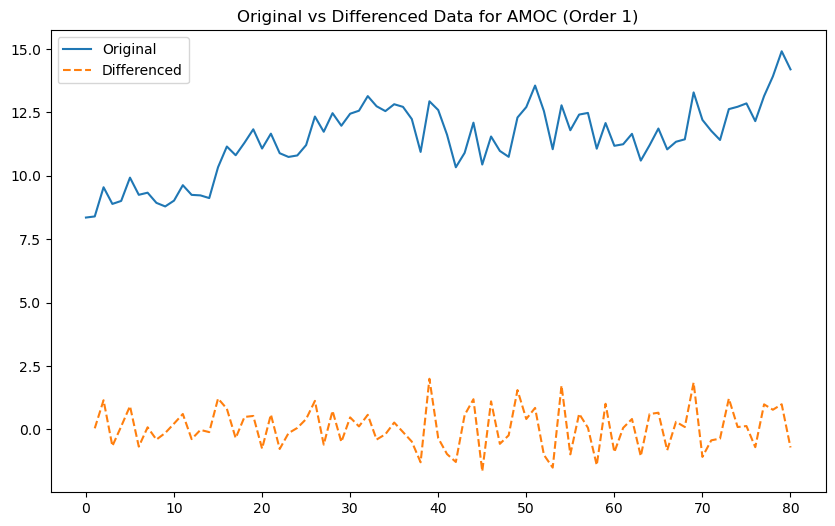

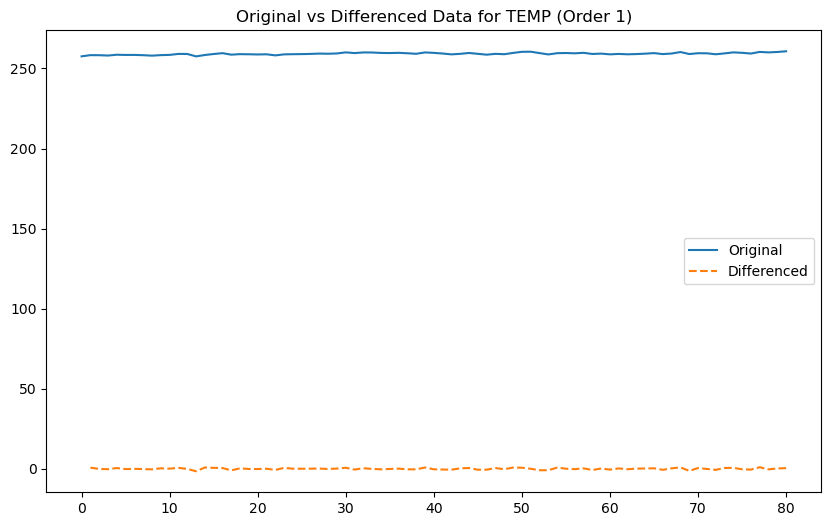

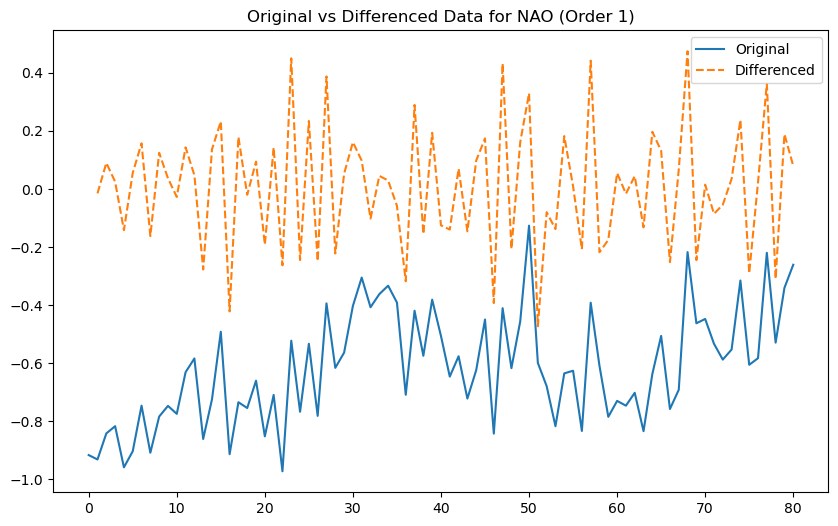

In [14]:
from toolbox import GC_functions as GC
import importlib
importlib.reload(GC)

stadial_data = {
    'AMOC': AMOC_stadials[0],
    'TEMP': TEMP_stadials[0],
    'NAO': NAO_stadials[0],
    'PRECIP': PRECIP_stadials[0],
    'SEA_ICE': SEA_ICE_stadials[0]
}

# Creating DataFrame from stadial S1 data
df_stadial_S1 = pd.DataFrame(stadial_data)

# Applying the make_stationary function
df_stadial_S1_stationary = GC.make_stationary(df_stadial_S1, df_stadial_S1.columns.tolist())


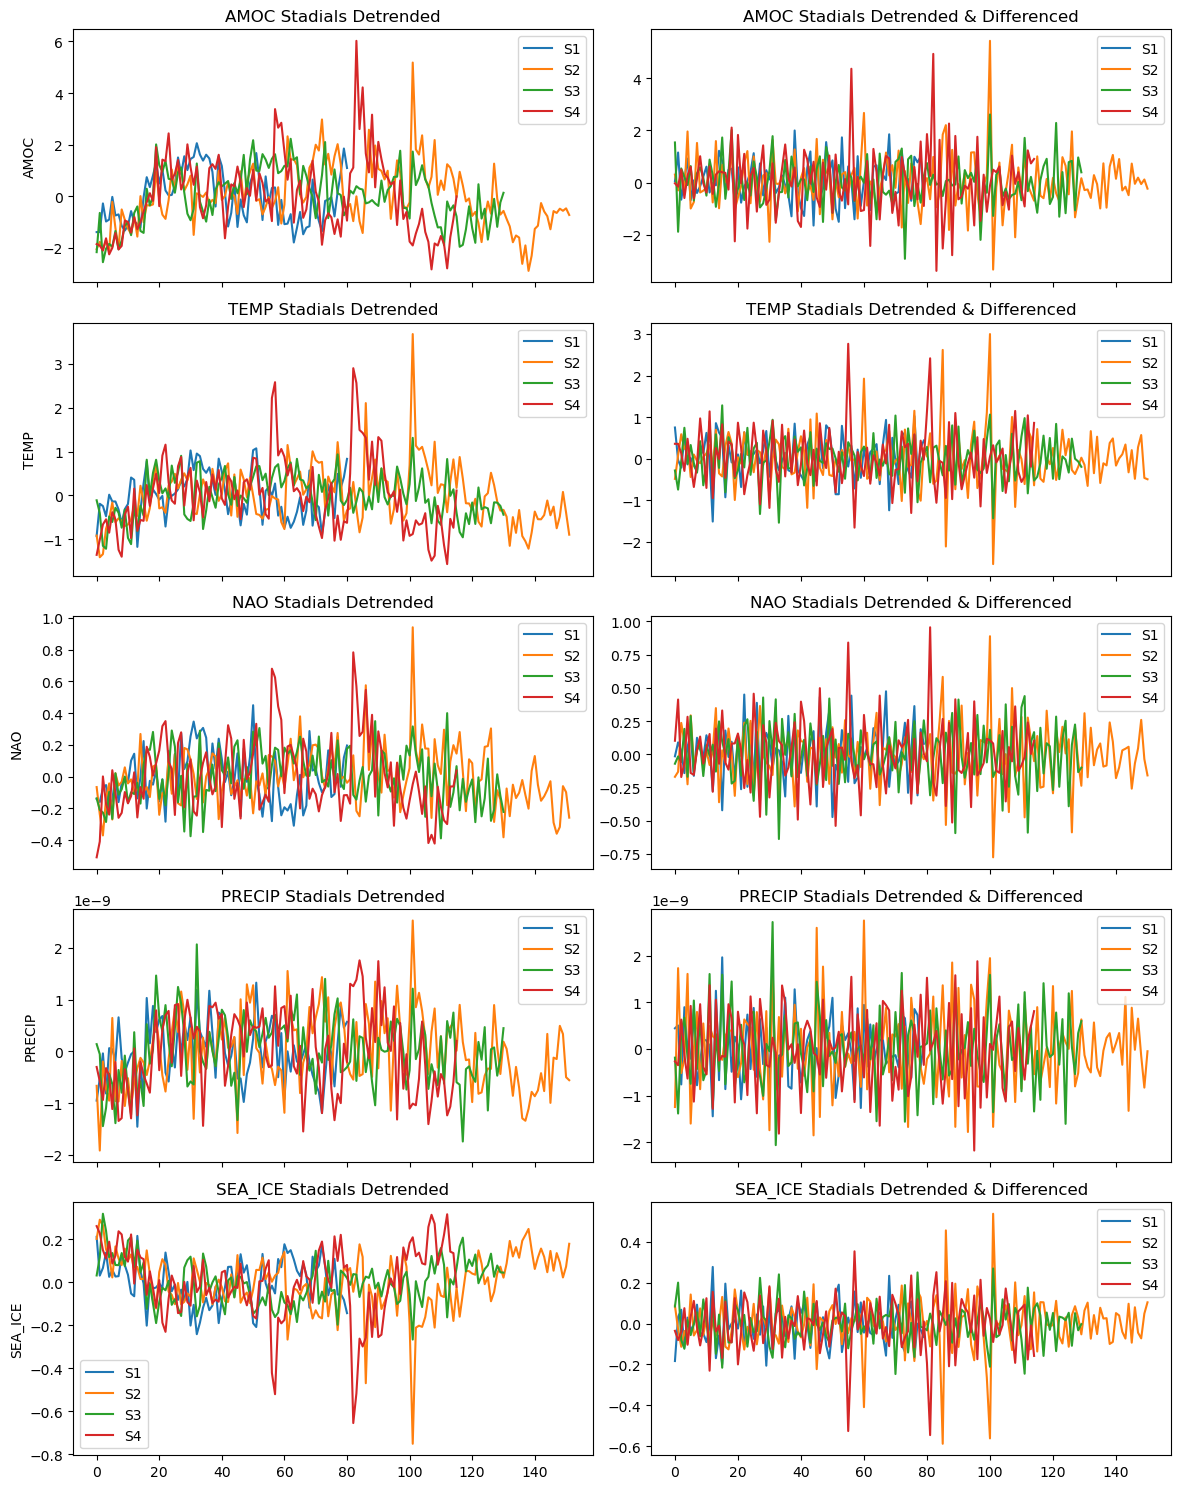

In [34]:
import pandas as pd
import numpy as np

# Function to difference data with order 1
def diff_data(original_data):
    diff_data = []
    for data in original_data:
            if len(data) > 1:  # Ensure there's enough data to detrend
                diff_data.append(np.diff(data))
            else:
                diff_data.append(data)  # If only one point or empty, skip detrending
    return diff_data


# Crop the data for each variable
variables = ['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE']

differenced_stadials = {var: diff_data(stadial_data[var]) for var in variables}

# Plotting the detrended data
fig, axs = plt.subplots(5, 2, figsize=(12, 15), sharex='col')
for i, var in enumerate(variables):
    # Plot detrended stadials
    for j, data in enumerate(detrended_stadials[var]):
        axs[i, 0].plot(data, label=f'{stadial_labels[j]}')
    axs[i, 0].set_title(f'{var} Stadials Detrended')
    axs[i, 0].set_ylabel(var)
    axs[i, 0].legend()

    # Plot detrended interstadials
    for j, data in enumerate(differenced_stadials[var]):
        axs[i, 1].plot(data, label=f'{stadial_labels[j]}')
    axs[i, 1].set_title(f'{var} Stadials Detrended & Differenced')
    axs[i, 1].legend()

plt.tight_layout()
plt.show()

In [35]:
# save the differenced stadial data under data/ using pickle
import pickle

with open('data/differenced_stadials.pkl', 'wb') as f:
    pickle.dump(differenced_stadials, f)
    

In [36]:
# load the differenced stadial data from the pickle file
import pickle

with open('data/differenced_stadials.pkl', 'rb') as f:
    differenced_stadials = pickle.load(f)

Processing Stadial 1

##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable AMOC has 5 link(s):
    [pc_alpha = 0.5]
        (AMOC -1): max_pval = 0.00306, |min_val| =  0.335
        (NAO -2): max_pval = 0.12989, |min_val| =  0.175
        (NAO -1): max_pval = 0.41594, |min_val| =  0.095
        (PRECIP -2): max_pval = 0.43589, |min_val| =  0.093
        (AMOC -2): max_pval = 0.46283, |min_val| =  0.085

    Variable TEMP has 2 link(s):
    [pc_alpha = 0.05]
        (SEA_ICE -1): max_pval = 0.01954, |min_val| =  0.269
        (TEMP -2): max_pval = 0.02910, |min_val| =  0.254

    Variable NAO has 5 link(s):
    [pc_alpha = 0.5]
        (NAO -1): max_pval = 0.00000, |min_val| =  0.552
        (TEMP -2): max_pval = 0.02686, |min_val| =  0.254
        (SEA_ICE -2): max_pval =

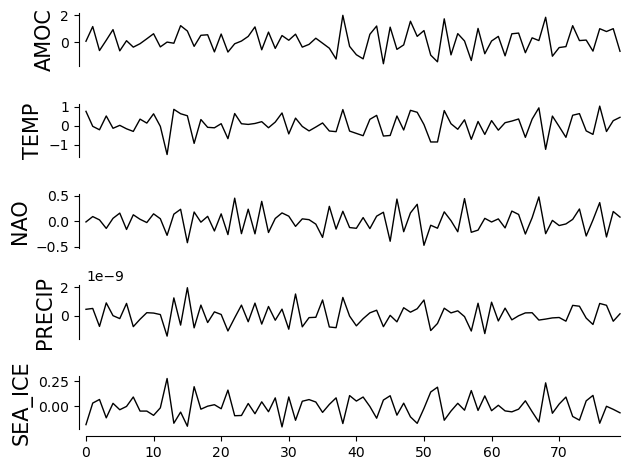

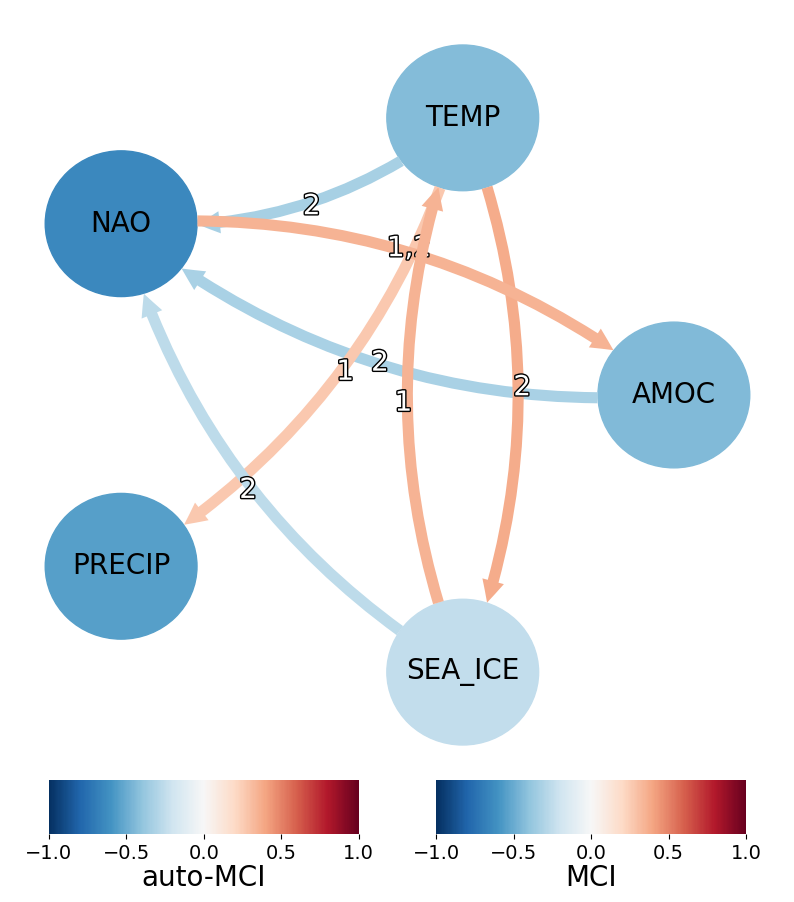

Processing Stadial 2

##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable AMOC has 5 link(s):
    [pc_alpha = 0.5]
        (AMOC -1): max_pval = 0.00006, |min_val| =  0.324
        (NAO -1): max_pval = 0.29334, |min_val| =  0.087
        (SEA_ICE -2): max_pval = 0.31758, |min_val| =  0.084
        (PRECIP -2): max_pval = 0.40465, |min_val| =  0.069
        (AMOC -2): max_pval = 0.42435, |min_val| =  0.066

    Variable TEMP has 4 link(s):
    [pc_alpha = 0.5]
        (TEMP -1): max_pval = 0.00168, |min_val| =  0.259
        (SEA_ICE -1): max_pval = 0.14838, |min_val| =  0.121
        (PRECIP -2): max_pval = 0.26206, |min_val| =  0.094
        (TEMP -2): max_pval = 0.42817, |min_val| =  0.067

    Variable NAO has 3 link(s):
    [pc_alpha = 0.2]
        (NAO -1): max_pval

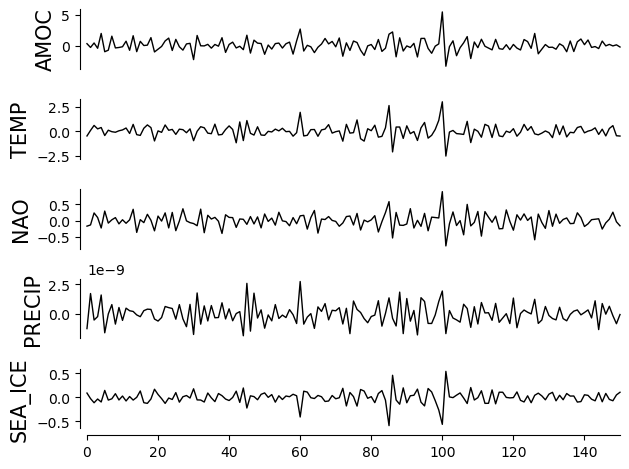

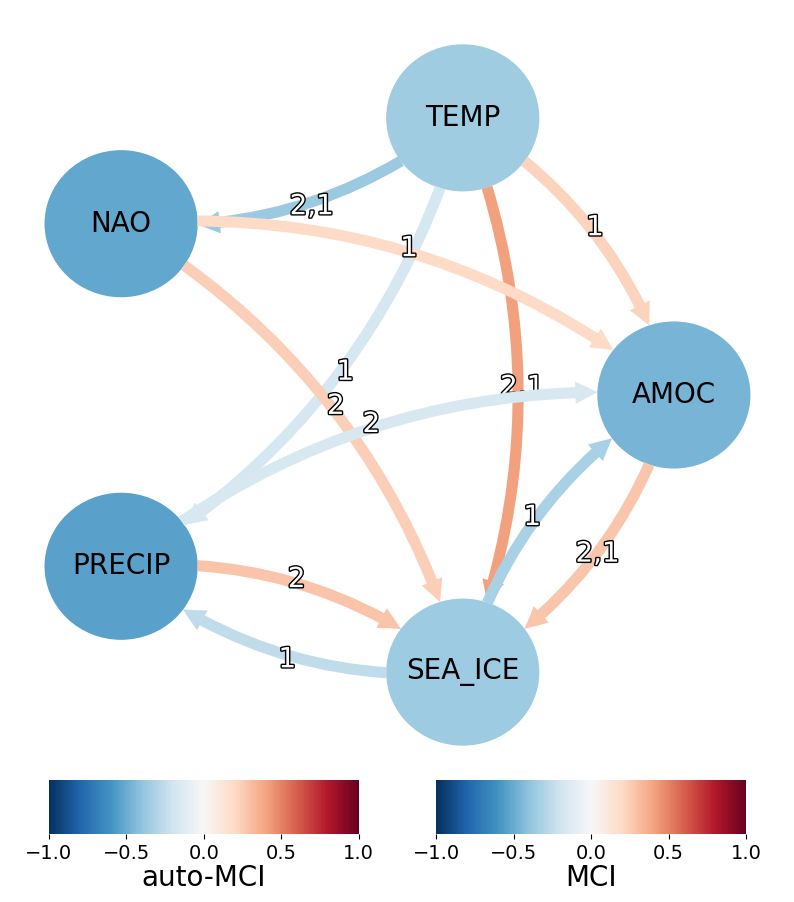

Processing Stadial 3

##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable AMOC has 5 link(s):
    [pc_alpha = 0.5]
        (AMOC -1): max_pval = 0.00023, |min_val| =  0.324
        (AMOC -2): max_pval = 0.21279, |min_val| =  0.112
        (TEMP -1): max_pval = 0.33603, |min_val| =  0.086
        (NAO -2): max_pval = 0.41427, |min_val| =  0.074
        (NAO -1): max_pval = 0.43357, |min_val| =  0.071

    Variable TEMP has 3 link(s):
    [pc_alpha = 0.3]
        (TEMP -1): max_pval = 0.00710, |min_val| =  0.241
        (SEA_ICE -1): max_pval = 0.13789, |min_val| =  0.134
        (AMOC -2): max_pval = 0.28755, |min_val| =  0.095

    Variable NAO has 3 link(s):
    [pc_alpha = 0.3]
        (NAO -1): max_pval = 0.00000, |min_val| =  0.542
        (TEMP -1): max_pval = 0.193

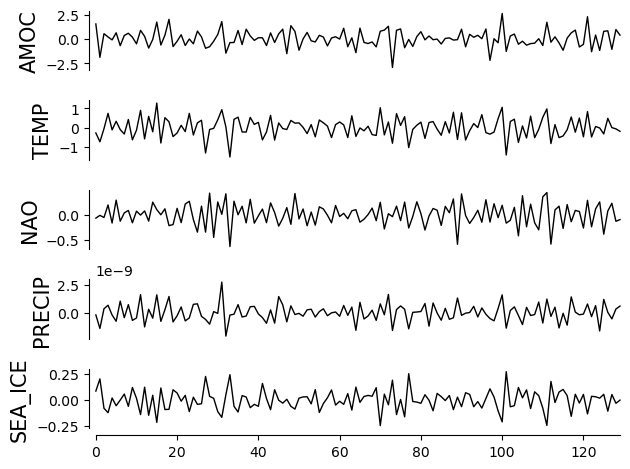

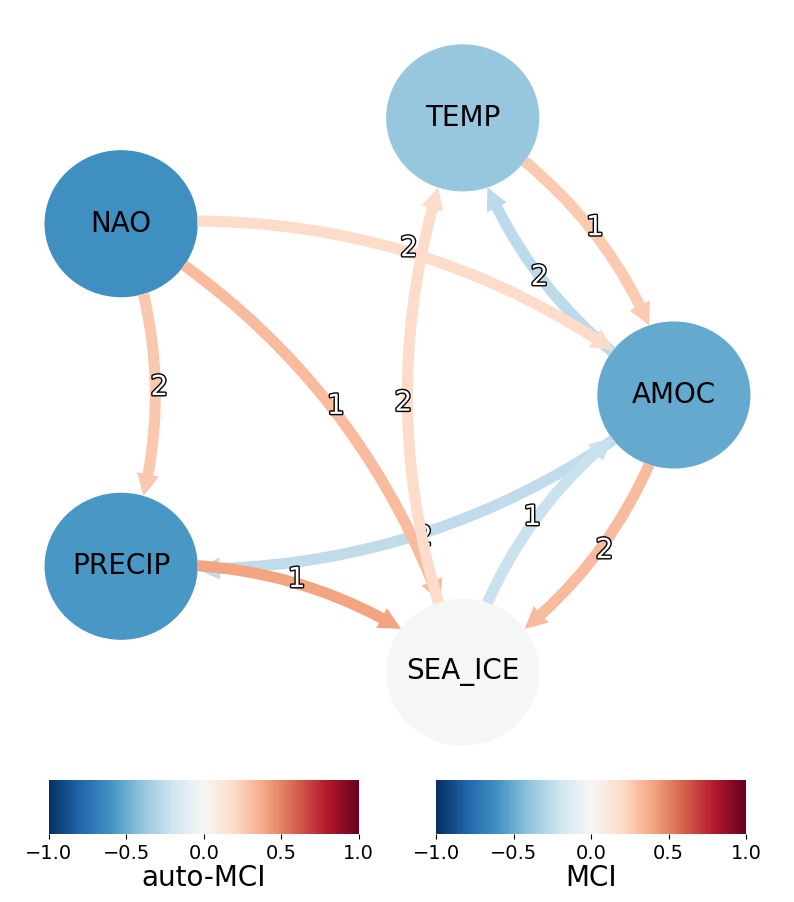

Processing Stadial 4

##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable AMOC has 5 link(s):
    [pc_alpha = 0.4]
        (AMOC -1): max_pval = 0.00000, |min_val| =  0.450
        (NAO -1): max_pval = 0.20069, |min_val| =  0.125
        (PRECIP -1): max_pval = 0.23018, |min_val| =  0.115
        (TEMP -2): max_pval = 0.29240, |min_val| =  0.101
        (SEA_ICE -1): max_pval = 0.32483, |min_val| =  0.094

    Variable TEMP has 3 link(s):
    [pc_alpha = 0.4]
        (AMOC -1): max_pval = 0.21078, |min_val| =  0.120
        (TEMP -1): max_pval = 0.26231, |min_val| =  0.108
        (AMOC -2): max_pval = 0.39859, |min_val| =  0.082

    Variable NAO has 5 link(s):
    [pc_alpha = 0.5]
        (NAO -1): max_pval = 0.00094, |min_val| =  0.314
        (AMOC -2): max_pval = 0.

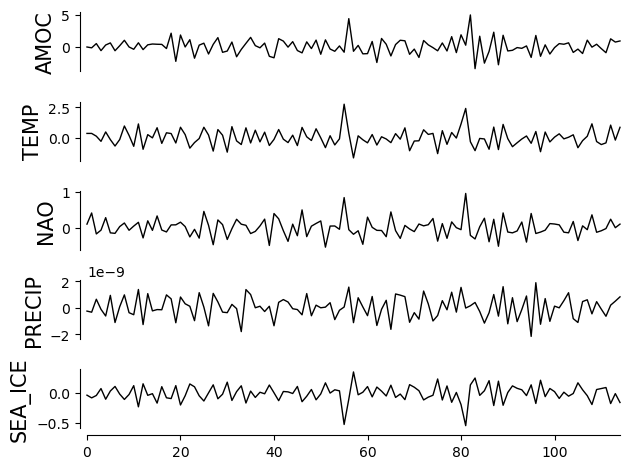

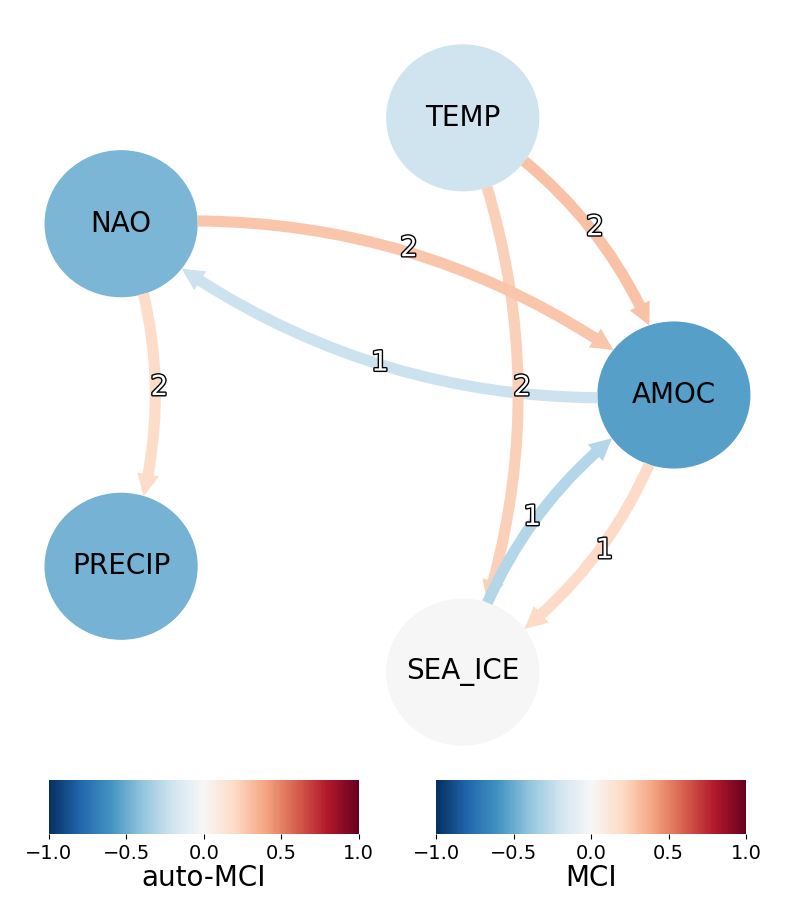

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr

# Variables and their names
variables = ['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE']
var_names = ['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE']

# Initialize the ParCorr independence test
ParCorr = parcorr.ParCorr(significance='analytic')

# Number of stadials
num_stadials = len(differenced_stadials['AMOC'])

# Loop through all stadials
for stadial_index in range(num_stadials):
    print(f"Processing Stadial {stadial_index + 1}")

    # Get the data for the current stadial from all variables and transpose it
    array = np.array([differenced_stadials[var][stadial_index] for var in variables]).T

    # Create a Tigramite DataFrame object
    dataframe_sta = pp.DataFrame(array,
                                 datatime=np.arange(len(array)),
                                 var_names=var_names)

    # Plotting the time series for this stadial
    tp.plot_timeseries(dataframe_sta, label_fontsize=15, tick_label_size=10)

    # PCMCI configuration and execution
    pcmci = PCMCI(
        dataframe=dataframe_sta,
        cond_ind_test=ParCorr,
        verbosity=1)

    tau_max = 2
    results = pcmci.run_pcmci(tau_min=1, tau_max=tau_max, pc_alpha=None)

    # Plotting the results
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)
    tp.plot_graph(
        fig_ax=(fig, ax),
        graph=results['graph'],
        val_matrix=results['val_matrix'],
        var_names=var_names,
        link_colorbar_label='MCI',
        node_colorbar_label='auto-MCI',
        link_label_fontsize=20,
        label_fontsize=20,
        tick_label_size=14,
        node_label_size=20,
        edge_ticks=0.5,
        node_ticks=0.5,
        node_size=0.5
    )

    plt.show()
    plt.close(fig)  # Close the figure to free up memory



##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable AMOC has 5 link(s):
    [pc_alpha = 0.5]
        (AMOC -1): max_pval = 0.00306, |min_val| =  0.335
        (NAO -2): max_pval = 0.12989, |min_val| =  0.175
        (NAO -1): max_pval = 0.41594, |min_val| =  0.095
        (PRECIP -2): max_pval = 0.43589, |min_val| =  0.093
        (AMOC -2): max_pval = 0.46283, |min_val| =  0.085

    Variable TEMP has 2 link(s):
    [pc_alpha = 0.05]
        (SEA_ICE -1): max_pval = 0.01954, |min_val| =  0.269
        (TEMP -2): max_pval = 0.02910, |min_val| =  0.254

    Variable NAO has 5 link(s):
    [pc_alpha = 0.5]
        (NAO -1): max_pval = 0.00000, |min_val| =  0.552
        (TEMP -2): max_pval = 0.02686, |min_val| =  0.254
        (SEA_ICE -2): max_pval = 0.07949, |min_val| =

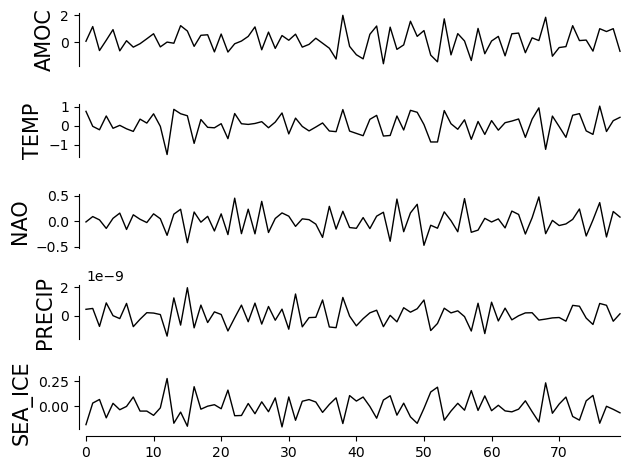

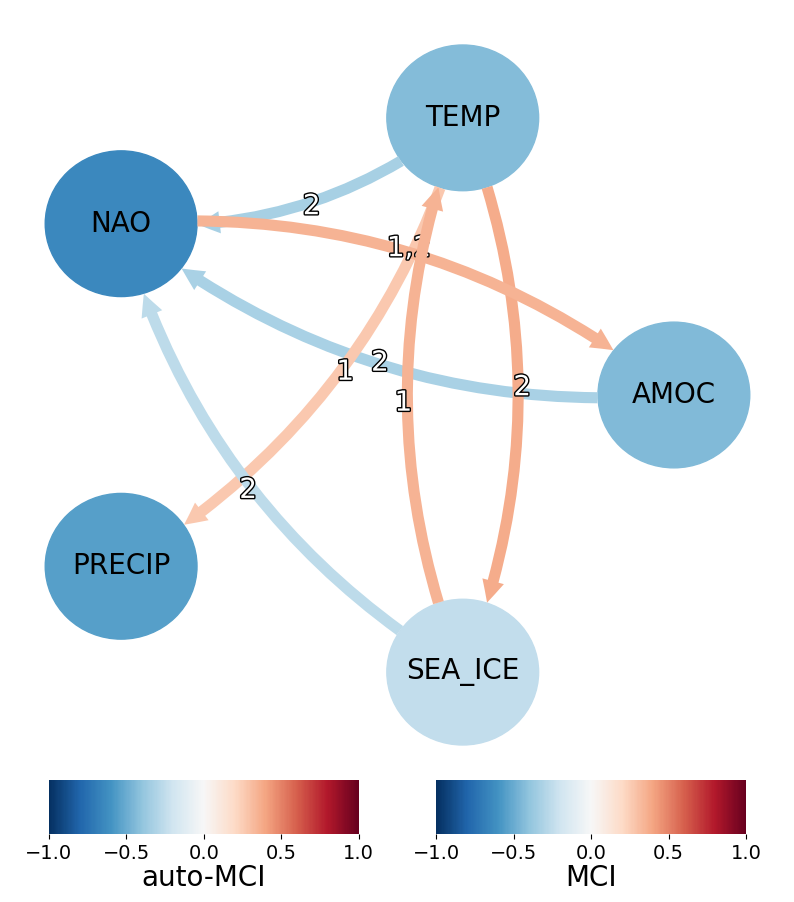

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn


# Get the first stadial of the differenced data for all variables and transpose the result to match Tigramite's expected input
array = np.array([differenced_stadials[var][0] for var in variables]).T

var_names = ['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE']
# Create a Tigramite DataFrame object
dataframe_sta = pp.DataFrame(array,
                             datatime=np.arange(len(array)),
                             var_names=var_names)

# Plotting the time series
tp.plot_timeseries(dataframe_sta, label_fontsize=15, tick_label_size=10)

# Initialize the ParCorr independence test
ParCorr = parcorr.ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe_sta,
    cond_ind_test=ParCorr,
    verbosity=1)

tau_max = 2
results = pcmci.run_pcmci(tau_min=1, tau_max=tau_max, pc_alpha=None)

# Plotting the results
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)
tp.plot_graph(
    fig_ax=(fig, ax),
    graph=results['graph'],
    val_matrix=results['val_matrix'],
    var_names=var_names,
    link_colorbar_label='MCI',
    node_colorbar_label='auto-MCI',
    link_label_fontsize=20,
    label_fontsize=20,
    tick_label_size=14,
    node_label_size=20,
    edge_ticks=0.5,
    node_ticks=0.5,
    node_size=0.5
)

plt.show()
